# Intro:
We're going to see what a winning team looks like statistically with:
- Wins vs losses
- Goals scored vs mediocre team goals scored
- The team attributes

## Import Dependencies

In [255]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [ ]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

## Merge Data

### Team and Attributes

In [257]:
teamsDF = teams.merge(team_attributes, on=['team_api_id', 'team_fifa_api_id'])
teamsDF.drop(['id_x', 'id_y'], axis=1, inplace=True)
teamsDF.drop_duplicates(subset=['date', 'team_long_name'], inplace = True)
teamsDF.duplicated(subset = ['date', 'team_long_name']).sum()
teamsDF.sample(3)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
16,9994,2007.0,Sporting Lokeren,LOK,2010-02-22 00:00:00,60,Balanced,NaN,Little,60,Mixed,Organised,50,Normal,40,Normal,50,Normal,Organised,65,Medium,65,Press,70,Wide,Cover
1195,8467,100804.0,St. Johnstone FC,JOH,2010-02-22 00:00:00,70,Fast,NaN,Little,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,30,Deep,70,Double,30,Narrow,Cover
1444,10190,898.0,FC St. Gallen,GAL,2014-09-19 00:00:00,52,Balanced,46.0,Normal,48,Mixed,Organised,39,Normal,39,Normal,37,Normal,Organised,40,Medium,41,Press,52,Normal,Cover
246,10003,1960.0,Swansea City,SWA,2015-09-10 00:00:00,45,Balanced,44.0,Normal,42,Mixed,Organised,34,Normal,36,Normal,55,Normal,Free Form,31,Deep,47,Press,42,Normal,Cover
56,8342,231.0,Club Brugge KV,CLB,2011-02-22 00:00:00,67,Fast,NaN,Little,47,Mixed,Free Form,68,Risky,49,Normal,53,Normal,Free Form,57,Medium,44,Press,47,Normal,Cover


In [258]:
teamsDF.shape

(1450, 26)

In [259]:
a, b, c = teams.shape, team_attributes.shape, teamsDF.shape
print('Original "team" shape:            ' + str(a))
print('Original "team attributes" shape: ' + str(b))
print('Modified "teamDF" shape:          ' + str(c))

Original "team" shape:            (299, 5)
Original "team attributes" shape: (1458, 25)
Modified "teamDF" shape:          (1450, 26)


### Country, League, and Match

In [260]:
leaguesDF = countries.merge(leagues, on=['id'])
leaguesDF = leaguesDF.rename(columns={'name_x':'Country', 'name_y':'League'})
leaguesDF.sample(3)

,id,Country,country_id,League
3,7809,Germany,7809,Germany 1. Bundesliga
7,17642,Portugal,17642,Portugal Liga ZON Sagres
1,1729,England,1729,England Premier League
5,13274,Netherlands,13274,Netherlands Eredivisie
9,21518,Spain,21518,Spain LIGA BBVA


In [261]:
leaguesDF = leaguesDF.merge(matches, on = ['country_id'])
leaguesDF.sample(3)

,id_x,Country,country_id,League,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
7796,4769,France,4769,France Ligue 1,7797,4769,2015/2016,8,2015-09-26 00:00:00,1989856,9851,10242,1,1,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,189181.0,147614.0,191788.0,30457.0,303358.0,148830.0,179793.0,40683.0,69541.0,79246.0,231199.0,79248.0,41160.0,16254.0,154228.0,243248.0,93994.0,466430.0,38435.0,26420.0,33116.0,281999.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>54</comment><stats...,1.73,3.5,5.50,1.80,3.5,5.00,1.75,3.40,4.65,1.70,3.3,5.50,1.76,3.55,5.72,1.80,3.30,5.0,NaN,NaN,NaN,1.75,3.60,4.40,NaN,NaN,NaN,NaN,NaN,NaN
7685,4769,France,4769,France Ligue 1,7686,4769,2015/2016,32,2016-04-03 00:00:00,1990047,7794,8592,2,1,1.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,11316.0,407765.0,156716.0,33812.0,42693.0,26216.0,143757.0,46243.0,40758.0,40197.0,564856.0,31293.0,210691.0,282286.0,31300.0,299984.0,23988.0,27277.0,254308.0,199834.0,473855.0,32627.0,<goal><value><comment>o</comment><stats><owngo...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>36</comment><stats...,3.25,3.1,2.38,3.00,3.1,2.40,3.10,3.10,2.30,3.10,3.1,2.40,3.17,3.17,2.54,3.10,3.10,2.4,NaN,NaN,NaN,3.20,3.13,2.45,NaN,NaN,NaN,NaN,NaN,NaN
11245,10257,Italy,10257,Italy Serie A,11246,10257,2010/2011,3,2010-09-19 00:00:00,888189,9976,8529,0,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,5.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,8.0,10.0,10.0,41818.0,24493.0,41879.0,25338.0,41729.0,38060.0,39194.0,42601.0,42664.0,27733.0,39496.0,42502.0,24414.0,24403.0,103266.0,39763.0,39222.0,41433.0,41136.0,41326.0,41411.0,39474.0,<goal />,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1.95,3.3,4.00,1.90,3.2,4.10,2.00,3.20,3.40,2.00,3.3,3.80,NaN,NaN,NaN,2.10,3.20,3.6,2.10,3

In [262]:
a, b = leaguesDF.shape, matches.shape
print('Modified "leagueDF" shape: ' + str(a))
print('Original "matches" shape:  ' + str(b))

Modified "leagueDF" shape: (25979, 118)
Original "matches" shape:  (25979, 115)


In [263]:
# capture only two columns
temp = teamsDF[['team_api_id', 'team_long_name']]
# rename the column to match other df for key
temp = temp.rename(columns={'team_api_id':'home_team_api_id'}) 
# make sure there's no duplicates
temp.drop_duplicates(subset=['home_team_api_id', 'team_long_name'], inplace = True)
# merge them together on 'home_team_api_id'
leaguesDF = leaguesDF.merge(temp, on=['home_team_api_id'], how='left')
# rename again for away columns
temp = temp.rename(columns={'home_team_api_id':'away_team_api_id'}) 
# merge again
leaguesDF = leaguesDF.merge(temp, on=['away_team_api_id'], how='left')
# drop some useless features
leaguesDF.drop(['id_x', 'id_y', 'country_id', 'league_id', 'stage'], axis=1, inplace=True)
# create a copy of 'leagueDF' to simplify the information even more
leaguesFinal = leaguesDF
leaguesFinal = leaguesFinal[['Country', 'League', 'season', 'date', 'match_api_id', 'team_long_name_x', 
                       'team_long_name_y', 'home_team_goal', 'away_team_goal']]

In [264]:
leaguesFinal = leaguesFinal.rename(columns={'team_long_name_x':'Home Team', 'team_long_name_y':'Away Team'})
leaguesFinal.sample(3)

,Country,League,season,date,match_api_id,Home Team,Away Team,home_team_goal,away_team_goal
18072,Portugal,Portugal Liga ZON Sagres,2009/2010,2010-05-09 00:00:00,686337,SL Benfica,Rio Ave FC,2,1
16164,Poland,Poland Ekstraklasa,2009/2010,2009-08-30 00:00:00,673733,Lech Poznań,GKS Bełchatów,2,2
15405,Netherlands,Netherlands Eredivisie,2014/2015,2014-10-05 00:00:00,1712465,Ajax,PEC Zwolle,0,0
6868,France,France Ligue 1,2013/2014,2014-03-08 00:00:00,1468468,Valenciennes FC,Stade Rennais FC,2,1
1051,Belgium,Belgium Jupiler League,2012/2013,2012-11-10 00:00:00,1224102,KSV Cercle Brugge,KAA Gent,2,2


In [265]:
def win(leaguesFinal):
    if leaguesFinal['home_team_goal'] > leaguesFinal['away_team_goal']:
        return leaguesFinal['Home Team']
    elif leaguesFinal['away_team_goal'] > leaguesFinal['home_team_goal']:
        return leaguesFinal['Away Team']
    elif leaguesFinal['home_team_goal'] == leaguesFinal['away_team_goal']:
        return "DRAW"
    
def loss(leaguesFinal):
    if leaguesFinal['home_team_goal'] < leaguesFinal['away_team_goal']:
        return leaguesFinal['Home Team']
    elif leaguesFinal['away_team_goal'] < leaguesFinal['home_team_goal']:
        return leaguesFinal['Away Team']
leaguesFinal["win"] = leaguesFinal.apply(lambda leaguesFinal:win(leaguesFinal),axis=1)
leaguesFinal["loss"] = leaguesFinal.apply(lambda leaguesFinal:loss(leaguesFinal),axis=1)

In [266]:
leaguesFinal.shape

(25979, 11)

In [267]:
leaguesFinal.sample(3)

,Country,League,season,date,match_api_id,Home Team,Away Team,home_team_goal,away_team_goal,win,loss
18938,Portugal,Portugal Liga ZON Sagres,2013/2014,2014-02-24 00:00:00,1498165,SL Benfica,Vitória Guimarães,1,0,SL Benfica,Vitória Guimarães
12325,Italy,Italy Serie A,2013/2014,2014-03-08 00:00:00,1536781,Catania,Cagliari,1,1,DRAW,None
5262,France,France Ligue 1,2009/2010,2009-08-16 00:00:00,653899,Olympique de Marseille,LOSC Lille,1,0,Olympique de Marseille,LOSC Lille
20917,Scotland,Scotland Premier League,2013/2014,2014-01-10 00:00:00,1474383,Aberdeen,Hibernian,1,0,Aberdeen,Hibernian
5828,France,France Ligue 1,2010/2011,2011-05-21 00:00:00,830524,AJ Auxerre,Stade Brestois 29,0,1,Stade Brestois 29,AJ Auxerre


## Feature Engineering

### Team Record (Win/Loss) DataFrame

In [268]:
seasons = leaguesFinal['season'].unique()
teams = teamsDF['team_long_name'].unique()
df = []

for i in seasons:
    season = leaguesFinal['season'] == i
    season = leaguesFinal[season]
    for j in teams:
        team_season_wins = season['win'] == j
        team_season_win_record = team_season_wins[team_season_wins].count()
        team_season_loss = season['loss'] == j
        team_season_loss_record = team_season_loss[team_season_loss].count()
        df.append((j, i, team_season_win_record, team_season_loss_record))
df = pd.DataFrame(df, columns=('Team', 'Seasons', 'Wins', 'Losses'))
df = df.rename(columns={'Team':'Home Team'}) 
df2 = leaguesFinal[['Home Team', 'League']]
df2.drop_duplicates(subset = ['Home Team'],inplace = True)
df = df.merge(df2, on = 'Home Team')
df = df.rename(columns={'Home Team':'Team'}) 
teamRecords = df
teamRecords = teamRecords[['League', 'Team', 'Seasons', 'Wins', 'Losses']]
teamRecords = teamRecords[teamRecords.Wins != 0]
teamRecords = teamRecords[teamRecords.Losses != 0]
teamRecords.sample(5)

,League,Team,Seasons,Wins,Losses
2223,Switzerland Super League,FC Luzern,2015/2016,15,12
1705,Portugal Liga ZON Sagres,S.C. Olhanense,2009/2010,5,11
255,England Premier League,Manchester City,2015/2016,19,10
296,England Premier League,Stoke City,2008/2009,12,17
1437,Poland Ekstraklasa,Ruch Chorzów,2013/2014,14,8


In [269]:
teamRecords.shape

(1453, 5)

### Team Goals by Season

In [270]:
df = []
home_goals = leaguesFinal.groupby(('Home Team', 'season'))['home_team_goal'].sum()
away_goals = leaguesFinal.groupby(('Away Team', 'season'))['away_team_goal'].sum()
a = home_goals.rename_axis(['Team','season'])
b = away_goals.rename_axis(['Team','season'])
df = (a.add(b, fill_value=0)).reset_index(name='Goals')
df = df.rename(columns={'season':'Seasons'}) 
teamRecords = teamRecords.merge(df, on = ['Team', 'Seasons'], how = 'left')
teamRecords.sort_values(['League', 'Team', 'Seasons'], ascending = True, inplace = True)
teamRecords.shape

(1453, 6)

In [271]:
teamRecords.sample(3)

,League,Team,Seasons,Wins,Losses,Goals
442,Germany 1. Bundesliga,Hamburger SV,2010/2011,12,13,46
1256,Spain LIGA BBVA,FC Barcelona,2009/2010,31,1,98
1404,Switzerland Super League,FC Aarau,2014/2015,6,18,31
480,Germany 1. Bundesliga,VfL Wolfsburg,2008/2009,21,7,80
1276,Spain LIGA BBVA,Real Sporting de Gijón,2009/2010,9,16,36


### League Winners

In [272]:
# create a df of the team with the best record from each 'League' for each 'Seasons'
leagueWinners_season = teamRecords
leagueWinners_season.sort_values(['League', 'Seasons', 'Wins'], ascending = False, inplace = True)
leagueWinners_season = leagueWinners_season[leagueWinners_season.Wins > 10]
leagueWinners_season = leagueWinners_season.groupby(['League', 'Seasons']).first()
leagueWinners_season.sample(3)

,,Team,Wins,Losses,Goals
League,Seasons,,,,
Portugal Liga ZON Sagres,2008/2009,FC Porto,21,2,61
Spain LIGA BBVA,2009/2010,FC Barcelona,31,1,98
England Premier League,2012/2013,Manchester United,28,5,86
Netherlands Eredivisie,2008/2009,AZ,25,4,66
France Ligue 1,2011/2012,Montpellier Hérault SC,25,6,68


## Visualization

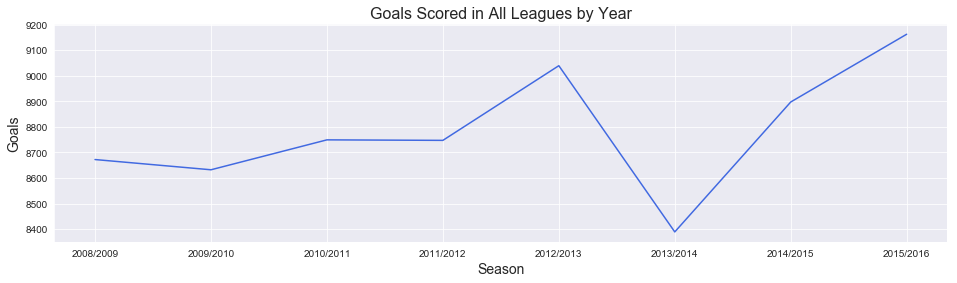

In [273]:
goals_per_year = []
seasons = leaguesFinal['season'].unique()

for i in range(0,8):
    mask = leaguesFinal['season'] == seasons[i]
    goals = leaguesFinal[mask]['home_team_goal'].sum() + leaguesFinal[mask]['away_team_goal'].sum()
    goals_per_year.append(goals)

df = pd.DataFrame([goals_per_year]).transpose()
df['Season'] = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
df = df.rename(columns = {0 : 'Goals'})

#
sns.set_style("darkgrid")
plt.figure(figsize=(16, 4))
plt.plot(df['Season'], df['Goals'], color = 'royalblue')
plt.ylabel('Goals', fontsize = 14)
plt.xlabel('Season', fontsize = 14)
plt.title('Goals Scored in All Leagues by Year', fontsize = 16)
mpl.rcParams['agg.path.chunksize'] = 10000

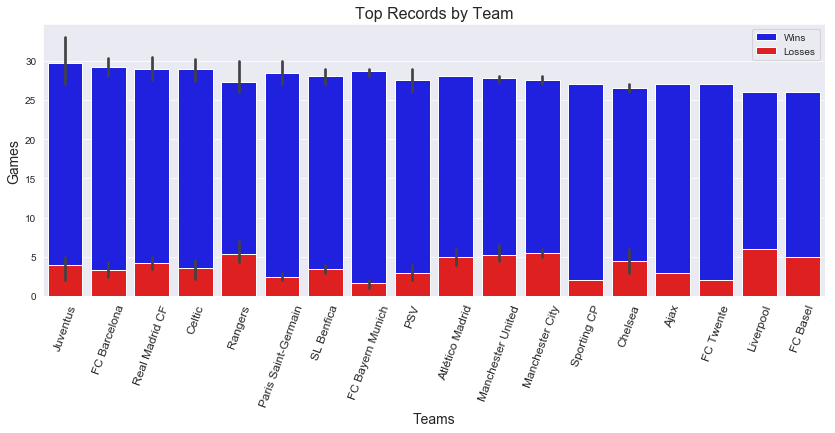

In [274]:
d = teamRecords.sort_values(by = 'Wins', ascending=False)
plt.figure(figsize=(14,5))
sns.barplot('Team', 'Wins', data = d[:50], color = 'b', label = 'Wins')
sns.barplot('Team', 'Losses', data = d[:50], color = 'r', label = 'Losses')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('Teams', fontsize = 14)
plt.ylabel('Games', fontsize = 14)
plt.legend(loc="best")
plt.title('Top Records by Team', fontsize = 16)
plt.show()

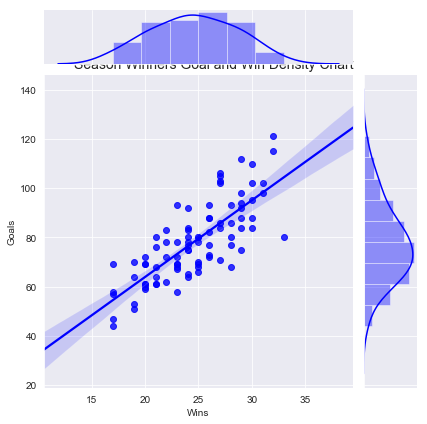

In [275]:
sns.jointplot(leagueWinners_season['Wins'], leagueWinners_season['Goals'], kind = 'reg', color = 'b')
plt.title('Season Winners Goal and Win Density Chart', loc = 'right', fontsize = 14)

plt.show()

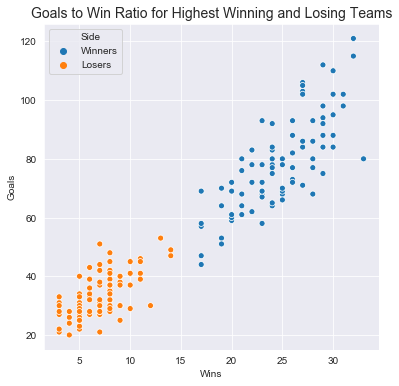

In [276]:
leagueWinners_season['Side'] = 'Winners'
leagueLosers_season['Side'] = 'Losers'
scatter = leagueWinners_season.merge(leagueLosers_season, how = 'outer')
scatter = scatter[['Wins', 'Goals', 'Side']]
plt.figure(figsize=(6,6))
plt.title('Goals to Win Ratio for Highest Winning and Losing Teams', fontsize = 14)
ax = sns.scatterplot(x = 'Wins', y = 'Goals', hue = 'Side', data = scatter)

Graph team attributes - winning vs losing? winning in top of each league? 
histogram 
Using something like this to break apart attributes features and quantify them?...

#This first concatenates your dataframe and the output of the get_dummies call, then it 
#groups the result according to the relevant columns, takes the sum of those columns among 
#those groups and then resets the index so you don't have to deal with a multi-index data frame
errorFeatures = pd.concat([errorData, pd.get_dummies(errorData.errorID)], 1).groupby(['machineID', 'datetime']).sum().reset_index()